<a href="https://colab.research.google.com/github/ldocarvalho/Analise-Grupos-Wine/blob/main/TP3_AnaliseGrupos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

-----------------------------------------------------
**2020/2** 

**Tópicos Especiais em Arquitetura de Computadores**

**TP03 - Análise de Grupos**

Lucas de Oliveira Carvalho

Lucas Luis de Souza Barreto

-----------------------------------------------------


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance

pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
# 1) Alcohol
# 2) Malic acid
# 3) Ash
# 4) Alcalinity of ash
# 5) Magnesium
# 6) Total phenols
# 7) Flavanoids
# 8) Nonflavanoid phenols
# 9) Proanthocyanins
# 10) Color intensity
# 11) Hue
# 12) OD280/OD315 of diluted wines
# 13) Proline

columns_names_wines = ["Class", "Alcohol","Malic", "Ash", "Alcalinity", "Magnesium", "Phenols", "Flavanoids", "Nonflavanoids", "Proanthocyanins", "Color", "Hue", "OD280", "Proline"]
dfWines = pd.read_csv('https://raw.githubusercontent.com/ldocarvalho/Analise-Grupos-Wine/main/wine.csv', names=columns_names_wines)
dfWines

,Class,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,OD280,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


#### Exercício 1 - Pré-Processamento

Objetivo: fazer o pré-processamento dos dados de tal forma que todos os atributos estejam normalizados no intervalo [0,1].

In [3]:
dfWines.drop("Class", inplace=True, axis=1)
dfWines.head(10)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [4]:
dfWines = (dfWines-dfWines.min()) / (dfWines.max() - dfWines.min())
dfWines.head(10)

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,OD280,Proline
0,0.842105,0.191700,0.572193,0.257732,0.619565,0.627586,0.573840,0.283019,0.593060,0.372014,0.455285,0.970696,0.561341
1,0.571053,0.205534,0.417112,0.030928,0.326087,0.575862,0.510549,0.245283,0.274448,0.264505,0.463415,0.780220,0.550642
2,0.560526,0.320158,0.700535,0.412371,0.336957,0.627586,0.611814,0.320755,0.757098,0.375427,0.447154,0.695971,0.646933
3,0.878947,0.239130,0.609626,0.319588,0.467391,0.989655,0.664557,0.207547,0.558360,0.556314,0.308943,0.798535,0.857347
4,0.581579,0.365613,0.807487,0.536082,0.521739,0.627586,0.495781,0.490566,0.444795,0.259386,0.455285,0.608059,0.325963
5,0.834211,0.201581,0.582888,0.237113,0.456522,0.789655,0.643460,0.396226,0.492114,0.466724,0.463415,0.578755,0.835949
6,0.884211,0.223320,0.582888,0.206186,0.282609,0.524138,0.459916,0.320755,0.495268,0.338737,0.439024,0.846154,0.721826
7,0.797368,0.278656,0.668449,0.360825,0.554348,0.558621,0.457806,0.339623,0.264984,0.321672,0.471545,0.846154,0.725392
8,1.000000,0.177866,0.433155,0.175258,0.293478,0.627586,0.556962,0.301887,0.495268,0.334471,0.487805,0.578755,0.547076
9,0.744737,0.120553,0.486631,0.278351,0.304348,0.689655,0.592827,0.169811,0.454259,0.506826,0.430894,0.835165,0.547076


#### Exercício 2 - Redução com Principal Component Analysis

In [5]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

features = columns_names_wines[1:]
values = dfWines.loc[:, features].values

values = StandardScaler().fit_transform(values)

pca = PCA(n_components=2)
principal_components = pca.fit_transform(values)
dfWines_reduced = pd.DataFrame(data = principal_components, columns = ['x', 'y'])
dfWines_reduced

,x,y
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


#### Exercício 3 - Medidas de Similaridade

Objetivo: calcular a similaridade entre objetos a partir de duas medidas, a distância Euclidiana e a correlação de Pearson.

In [ ]:
def eucledian_distance(x, y):
  return distance.euclidean(x, y)

def pearsons_correlation_coefficient(x, y):
  return np.corrcoef(x, y)

#### Exercício 4 - Algoritmos de Agrupamento 

##### K-Means

In [ ]:
# from sklearn.cluster import KMeans

# k_means = KMeans(n_clusters=4, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
# y_k_means = k_means.fit_predict(dfWines_reduced)
# y_k_means

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 0,
       0, 0, 2, 0, 2, 0, 2, 1, 0, 2, 0, 2, 0, 0, 0, 0, 2, 3, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 2, 2, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3], dtype=int32)

In [ ]:
# dfWines_reduced[y_k_means == 0]['x']

4     -0.202546
21    -0.267900
23    -0.417895
24    -0.449940
25    -0.215788
37    -0.232004
38    -0.305480
43    -0.111517
62    -0.010291
63    -0.453681
65    -0.132514
66    -0.481661
67    -0.137360
69    -0.345032
71    -0.408324
74    -0.459562
76    -0.064940
78    -0.133929
79    -0.086346
80    -0.187477
81    -0.253589
84    -0.207555
85    -0.184827
93    -0.183815
94    -0.234624
95    -0.398763
97    -0.203237
98    -0.491302
99    -0.222212
100   -0.178415
102   -0.045963
104   -0.168360
109   -0.363262
110   -0.258929
120   -0.220709
121   -0.357856
124   -0.276380
126   -0.056157
Name: x, dtype: float64

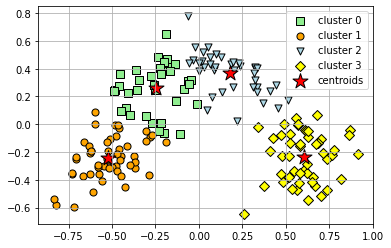

In [ ]:
# plt.scatter(
#     dfWines_reduced[y_k_means == 0]['x'], dfWines_reduced[y_k_means == 0]['y'],
#     s=50, c='lightgreen',
#     marker='s', edgecolor='black',
#     label='cluster 0'
# )

# plt.scatter(
#     dfWines_reduced[y_k_means == 1]['x'], dfWines_reduced[y_k_means == 1]['y'],
#     s=50, c='orange',
#     marker='o', edgecolor='black',
#     label='cluster 1'
# )

# plt.scatter(
#     dfWines_reduced[y_k_means == 2]['x'], dfWines_reduced[y_k_means == 2]['y'],
#     s=50, c='lightblue',
#     marker='v', edgecolor='black',
#     label='cluster 2'
# )

# plt.scatter(
#     dfWines_reduced[y_k_means == 3]['x'], dfWines_reduced[y_k_means == 3]['y'],
#     s=50, c='yellow',
#     marker='D', edgecolor='black',
#     label='cluster 3'
# )

# plt.scatter(
#     k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1],
#     s=250, marker='*',
#     c='red', edgecolor='black',
#     label='centroids'
# )

# plt.legend(scatterpoints=1)
# plt.grid()
# plt.show()

##### DBScan

#### Exercício 5 - Centroides K-Means

#### Exercício 6 - Atributos Ordenados

#### Exercício 7 - Visualização dos dados

#### Exercício 8 - Índice de Dunn e Índice Silhueta